<a href="https://colab.research.google.com/github/kgpgit/WebScraping/blob/main/Englishnow_podcast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

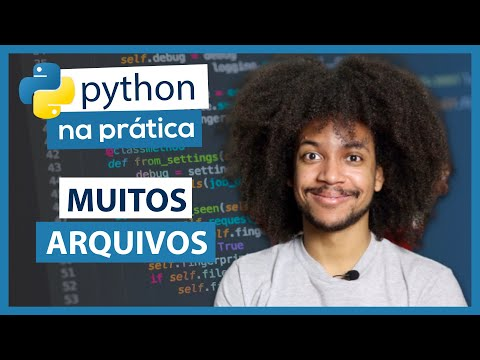

In [ ]:
# Utilizando os conceitos abordados por esse mago da programação, foi desenvolvido um escript para a varredura dos arquivos do melhor podcast de inglês que eu conheço...
# divirtam-se. 
from IPython.display import YouTubeVideo
YouTubeVideo('qx2LGtKzjxk', width= 640,height=360)

In [5]:
# Importação das bibliotecas
import requests
from bs4 import BeautifulSoup


In [6]:
# Constantes: Urlbase && Cabeçalho
URL_BASE = 'https://speakenglishpodcast.com/podcast/'
HEADERS = {
        'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.198 Safari/537.36"}

In [7]:
# Carregar todo o html da pagina
def buscar_conteudo (url, cabecalho):
  site = requests.get(url, headers=cabecalho)
  soup = BeautifulSoup(site.content, 'html.parser')
  return soup

In [10]:
# Salvar os arquivos em disco local
def salvar_arquivo(link):
  try: 
    r = requests.get(link)
    with open(file_name, 'wb') as f:  
      f.write(r.content)  
      print( "%s downloaded!\n"%file_name )
  except:
    print ('erro: ', link )

In [8]:
# Verficar quantas paginas existem para navegar
last_page_link = buscar_conteudo(URL_BASE, HEADERS)
last_page_link = last_page_link.find('a', class_='last')['href'] # filtra o conteudo das url por classe
ultima_pagina = last_page_link.split('/')[-2]

print(ultima_pagina)

41


In [ ]:
# Scraping
for i in reversed(range(1,int(ultima_pagina) + 1)): #varredura da pagina iniciando da ultima para a primeira "reversed"
  url_pag = URL_BASE + f'page/{i}' #url da página
  print("url_pag: ", url_pag)
  url_artigos = buscar_conteudo(url_pag, HEADERS)#obter a página dos artigos
  url_artigos = url_artigos.find_all('h2', class_='entry-title') # filtra o conteudo das url's dos artigos por classe
  for cell in url_artigos: # separar os links dos artigos
    link = cell.find('a')['href']
    url_arquivo = link
    links = buscar_conteudo(url_arquivo, HEADERS)#obter a página dos arquivos
    links = links.find_all('li')
    qtd_links = len(links) # contabilizar a quantidade de arquivos para download
    for i in range(0,qtd_links): # baixar apenas arquivos mp3 e pdf
      texto = str(links[i])
      if 'href' and ('.mp3') in texto:
        link = links[i].a['href']
        frase = link.split('/')
        file_name = frase[-1]
        salvar_arquivo(link)
      elif 'href' and ('.pdf') in texto:
        link = links[i].a['href']
        frase = link.split('/')
        file_name = frase[-1]
        salvar_arquivo(link)
